In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

In [2]:
df= pd.read_csv("placement.csv")

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [5]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

Text(0, 0.5, 'Package in lakhs')

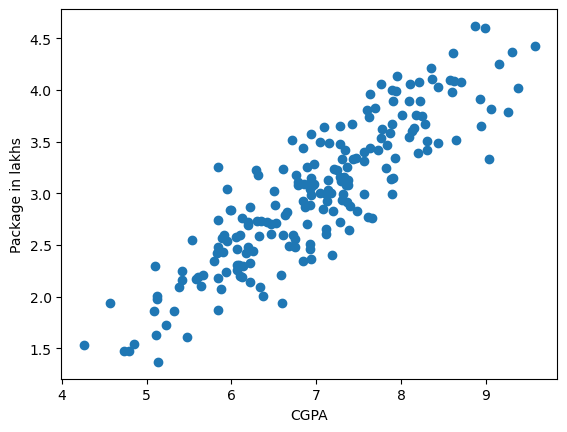

In [6]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("CGPA")
plt.ylabel("Package in lakhs")

In [7]:
X=df.iloc[:,0:1]

In [8]:
y=df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [11]:
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/Users/nikhil/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'Package in lakhs')

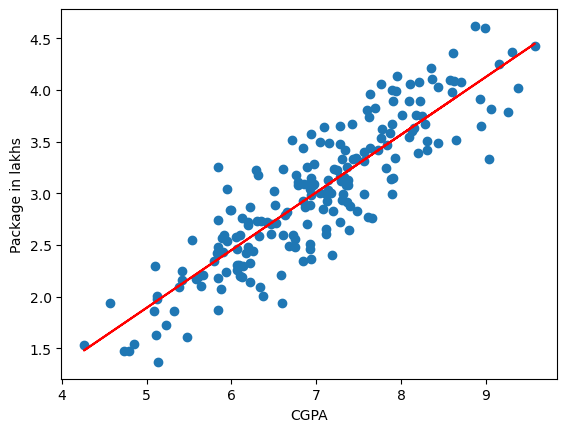

In [13]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='Red')
plt.xlabel("CGPA")
plt.ylabel("Package in lakhs")

In [14]:
m=lr.coef_

In [15]:
b=lr.intercept_

In [16]:
#y= mx+b

In [17]:
print(m,b)

[0.55795197] -0.8961119222429144


In [18]:
lr.predict(X_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [21]:
y_pred=lr.predict(X_test)

In [22]:
print("Mae",mean_absolute_error(y_test,y_pred))

Mae 0.2884710931878175


the model is making mistake of 0.29 lpa on an average on the dataset

In [23]:
print("mse",mean_squared_error(y_test,y_pred))

mse 0.12129235313495527


In [25]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


This is also in lpa, but mse is not in lpa, i.e unit of y column is not taken directlt

In [26]:
print("R2",r2_score(y_test,y_pred))

R2 0.780730147510384


its explaining 78 percent of variance of y column 

In [27]:
# adjust r2 score 

In [28]:
r2=r2_score(y_test,y_pred)



In [29]:
X_test.shape

(40, 1)

In [31]:
adjusted_r2=1-((1-r2)*(40-1)/(40-1-1))

In [32]:

adjusted_r2

0.7749598882343415

In [33]:
new_df1=df.copy()
new_df1["random_values"]=np.random.random(200)

new_df1=new_df1[['cgpa','random_values','package']]

In [34]:
new_df1.head()

,cgpa,random_values,package
0,6.89,0.977089,3.26
1,5.12,0.208661,1.98
2,7.82,0.661359,3.25
3,7.42,0.749376,3.67
4,6.94,0.255291,3.57


In [35]:
X=new_df1.iloc[:,0:2]
y=new_df1.iloc[:,-1]

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.2)

In [37]:
lr=LinearRegression()

In [38]:
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred=lr.predict(X_test)

In [41]:
r2=r2_score(y_test,y_pred)


In [42]:
r2

0.7748237785838368

In [44]:
adjusted_r2=1-((1-r2)*(40-1)/(40-1-2))

In [45]:
adjusted_r2

0.7626520909397199